In [4]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

c:\Users\admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [5]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [6]:
# Load the data
stat_data = pd.read_csv("./stats_merged.csv")
stat_data.head()

,Review id,Review date,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Inflight Entertainment,Ground Service,Value For Money,Food & Beverages,Aircraft,Wifi & Connectivity,Recommended
0,anchor885571,2024-01-11,Solo Leisure,Economy Class,Istanbul to Murmansk via Moscow,January 2024,1.00,1.00,1,1.00,1.00,1,NaN,1.0,no
1,anchor881710,2023-12-01,Business,Business Class,Moscow to Dubai,November 2023,2.00,2.00,1,1.00,1.00,1,A330-300,1.0,no
2,anchor767446,2022-01-30,Solo Leisure,Business Class,London to Moscow,January 2022,5.00,2.00,5,2.00,2.00,4,A350-900,3.0,no
3,anchor758822,2021-11-10,Business,Economy Class,Vladivostok to Grozny,August 2021,5.00,5.00,NaN,5.00,5.00,5,Sukhoi Superjet 100,5.0,yes
4,anchor754420,2021-09-25,Business,Business Class,Larnaca to Moscow,September 2021,4.00,5.00,4,5.00,4.00,4,Boeing 777-300ER,NaN,yes


In [7]:
print(stat_data['Type Of Traveller'].value_counts())
print(stat_data['Seat Type'].value_counts())

Type Of Traveller
Solo Leisure      20834
Couple Leisure    15127
Family Leisure    12445
Business           9522
Name: count, dtype: int64
Seat Type
Economy Class      45149
Business Class      8617
Premium Economy     2677
First Class         1476
Name: count, dtype: int64


In [8]:
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57932 entries, 0 to 57931
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Review id               57932 non-null  object 
 1   Review date             57932 non-null  object 
 2   Type Of Traveller       57928 non-null  object 
 3   Seat Type               57919 non-null  object 
 4   Route                   57822 non-null  object 
 5   Date Flown              57895 non-null  object 
 6   Seat Comfort            57930 non-null  float64
 7   Cabin Staff Service     57932 non-null  float64
 8   Inflight Entertainment  43479 non-null  object 
 9   Ground Service          57887 non-null  float64
 10  Value For Money         57932 non-null  float64
 11  Food & Beverages        53042 non-null  object 
 12  Aircraft                28397 non-null  object 
 13  Wifi & Connectivity     26380 non-null  object 
 14  Recommended             57932 non-null

In [9]:
# Check dupplicates
stat_data.duplicated().sum()

0

In [10]:
# Check missing values
stat_data.isnull().sum()

Review id                     0
Review date                   0
Type Of Traveller             4
Seat Type                    13
Route                       110
Date Flown                   37
Seat Comfort                  2
Cabin Staff Service           0
Inflight Entertainment    14453
Ground Service               45
Value For Money               0
Food & Beverages           4890
Aircraft                  29535
Wifi & Connectivity       31552
Recommended                   0
dtype: int64

In [11]:
# Drop column wifi and connectivity
stat_data.drop(['Wifi & Connectivity','Review date','Route','Date Flown', 'Aircraft'], axis=1, inplace=True)
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57932 entries, 0 to 57931
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Review id               57932 non-null  object 
 1   Type Of Traveller       57928 non-null  object 
 2   Seat Type               57919 non-null  object 
 3   Seat Comfort            57930 non-null  float64
 4   Cabin Staff Service     57932 non-null  float64
 5   Inflight Entertainment  43479 non-null  object 
 6   Ground Service          57887 non-null  float64
 7   Value For Money         57932 non-null  float64
 8   Food & Beverages        53042 non-null  object 
 9   Recommended             57932 non-null  object 
dtypes: float64(4), object(6)
memory usage: 4.4+ MB


In [12]:
star_rate_col = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Value For Money']
# Convert column 'Food & Beverages', 'Inflight Entertainment' to numeric
stat_data['Food & Beverages'] = pd.to_numeric(stat_data['Food & Beverages'], errors='coerce')
stat_data['Inflight Entertainment'] = pd.to_numeric(stat_data['Inflight Entertainment'], errors='coerce')
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57932 entries, 0 to 57931
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Review id               57932 non-null  object 
 1   Type Of Traveller       57928 non-null  object 
 2   Seat Type               57919 non-null  object 
 3   Seat Comfort            57930 non-null  float64
 4   Cabin Staff Service     57932 non-null  float64
 5   Inflight Entertainment  43476 non-null  float64
 6   Ground Service          57887 non-null  float64
 7   Value For Money         57932 non-null  float64
 8   Food & Beverages        53040 non-null  float64
 9   Recommended             57932 non-null  object 
dtypes: float64(6), object(4)
memory usage: 4.4+ MB


In [13]:
# Fill missing values with median for star_rate_col
for col in star_rate_col:
    stat_data[col].fillna(stat_data[col].median(), inplace=True)

In [14]:
stat_data.isnull().sum()

Review id                  0
Type Of Traveller          4
Seat Type                 13
Seat Comfort               0
Cabin Staff Service        0
Inflight Entertainment     0
Ground Service             0
Value For Money            0
Food & Beverages           0
Recommended                0
dtype: int64

In [15]:
# Drop Type Of Traveller and Seat Type
for col in ['Type Of Traveller','Seat Type']:
    stat_data[col].fillna(stat_data[col].mode()[0], inplace=True)
stat_data.isnull().sum()

Review id                 0
Type Of Traveller         0
Seat Type                 0
Seat Comfort              0
Cabin Staff Service       0
Inflight Entertainment    0
Ground Service            0
Value For Money           0
Food & Beverages          0
Recommended               0
dtype: int64

In [16]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
stat_data[['Type Of Traveller','Seat Type']] = ordinal_encoder.fit_transform(stat_data[['Type Of Traveller','Seat Type']])
stat_data.head()

,Review id,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Inflight Entertainment,Ground Service,Value For Money,Food & Beverages,Recommended
0,anchor885571,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,no
1,anchor881710,0.00,0.00,2.00,2.00,1.00,1.00,1.00,1.00,no
2,anchor767446,3.00,0.00,5.00,2.00,5.00,2.00,2.00,4.00,no
3,anchor758822,0.00,1.00,5.00,5.00,3.00,5.00,5.00,5.00,yes
4,anchor754420,0.00,0.00,4.00,5.00,4.00,5.00,4.00,4.00,yes


In [17]:
# Take the last column and make it the target
target = stat_data.iloc[:, -1]
data = stat_data.iloc[:,1:-1]

X = data
y = target

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)

#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#train, test = clf.fit(X_train, X_test, y_train, y_test)

In [17]:
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.94,0.94,None,0.94,15.89
LGBMClassifier,0.94,0.94,None,0.94,0.67
AdaBoostClassifier,0.94,0.94,None,0.94,2.28
RidgeClassifierCV,0.94,0.94,None,0.94,0.22
RidgeClassifier,0.94,0.94,None,0.94,0.22
LinearDiscriminantAnalysis,0.94,0.94,None,0.94,0.51
SGDClassifier,0.94,0.94,None,0.94,0.16
LogisticRegression,0.94,0.94,None,0.94,0.23
LinearSVC,0.94,0.94,None,0.94,0.95


In [18]:
test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.94,0.94,None,0.94,15.89
LGBMClassifier,0.94,0.94,None,0.94,0.67
AdaBoostClassifier,0.94,0.94,None,0.94,2.28
RidgeClassifierCV,0.94,0.94,None,0.94,0.22
RidgeClassifier,0.94,0.94,None,0.94,0.22
LinearDiscriminantAnalysis,0.94,0.94,None,0.94,0.51
SGDClassifier,0.94,0.94,None,0.94,0.16
LogisticRegression,0.94,0.94,None,0.94,0.23
LinearSVC,0.94,0.94,None,0.94,0.95


In [19]:
# Tune the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [20]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
rf.feature_importances_

array([0.02562089, 0.01478318, 0.09790424, 0.15348287, 0.03860142,
       0.19670043, 0.3741438 , 0.09876317])

In [22]:
y_pred = rf.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred)

0.9377750927763874

In [25]:
cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')

array([0.93721683, 0.93851133, 0.93484358, 0.92901834, 0.93829558,
       0.94281398, 0.93892965, 0.9302978 , 0.94410876, 0.93871385])

In [37]:
# Tune 1
rf_tuned = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=5, min_samples_split=2, min_samples_leaf=1, criterion='gini')
rf_tuned.fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred_tuned))
print(cross_val_score(rf_tuned, X_train, y_train, cv=10, scoring='accuracy'))

0.9445930784499871
[0.94498382 0.94627832 0.94239482 0.94023732 0.94843581 0.95101424
 0.94389297 0.93871385 0.95317221 0.94561934]


In [27]:
# Tune 2
rf_tuned = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=5, min_samples_split=10, min_samples_leaf=1, criterion='entropy')
rf_tuned.fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred_tuned))
print(cross_val_score(rf_tuned, X_train, y_train, cv=10, scoring='accuracy'))

0.944247863985501
[0.94498382 0.94800431 0.94088457 0.94045307 0.94692557 0.95058265
 0.94346137 0.93871385 0.95230902 0.94518774]


In [28]:
# Tune 3
rf_tuned = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=5, min_samples_split=10, min_samples_leaf=1, criterion='gini', max_features='sqrt')
rf_tuned.fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred_tuned))
print(cross_val_score(rf_tuned, X_train, y_train, cv=10, scoring='accuracy'))

0.9445930784499871
[0.94541532 0.94735707 0.94131607 0.94002157 0.94951456 0.94993526
 0.94367717 0.93914545 0.95123004 0.94583513]


In [30]:
# Tune with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [31]:
# Tune 4
rf_tuned = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=5, min_samples_split=2, min_samples_leaf=1, criterion='entropy')
rf_tuned.fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred_tuned))
print(cross_val_score(rf_tuned, X_train, y_train, cv=10, scoring='accuracy'))

0.9441615603693795
[0.94498382 0.94627832 0.94196332 0.93915858 0.94843581 0.95123004
 0.94432456 0.93892965 0.95166163 0.94540354]


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(5, 10, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

# Perform the randomized search
random_search.fit(X_train, y_train)

# Print the best parameters
print(random_search.best_params_)


{'criterion': 'entropy', 'max_depth': 27, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 343}


In [36]:
# Tune 5 using RandomizedSearchCV
rf_tuned = RandomForestClassifier(criterion= 'entropy', max_depth= 27, min_samples_leaf= 4, min_samples_split= 8, n_estimators= 343)
rf_tuned.fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred_tuned))
print(cross_val_score(rf_tuned, X_train, y_train, cv=10, scoring='accuracy'))

0.9435574350565289
[0.94541532 0.94778857 0.94110032 0.93980583 0.94886731 0.95079845
 0.94389297 0.93849806 0.95123004 0.94648252]


### SHAP

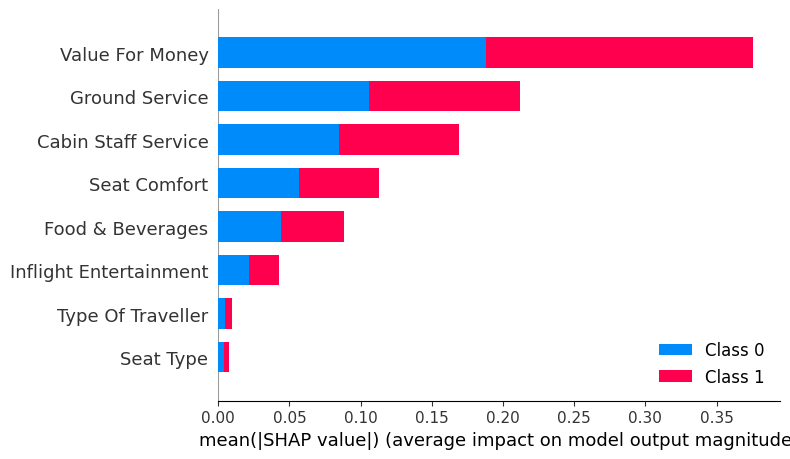

In [38]:
# SHAP values
import shap
shap.initjs()
explainer = shap.TreeExplainer(rf_tuned)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")


Value For Money: 0.19129196513333907
Ground Service: 0.024820919996547907
Cabin Staff Service: 0.020488478467247807
Seat Comfort: 0.006058513851730419
Food & Beverages: 0.0059117977043238405
Inflight Entertainment: 0.0019504617243462862
Seat Type: 0.0010442737550703462
Type Of Traveller: 0.0005091913351169764


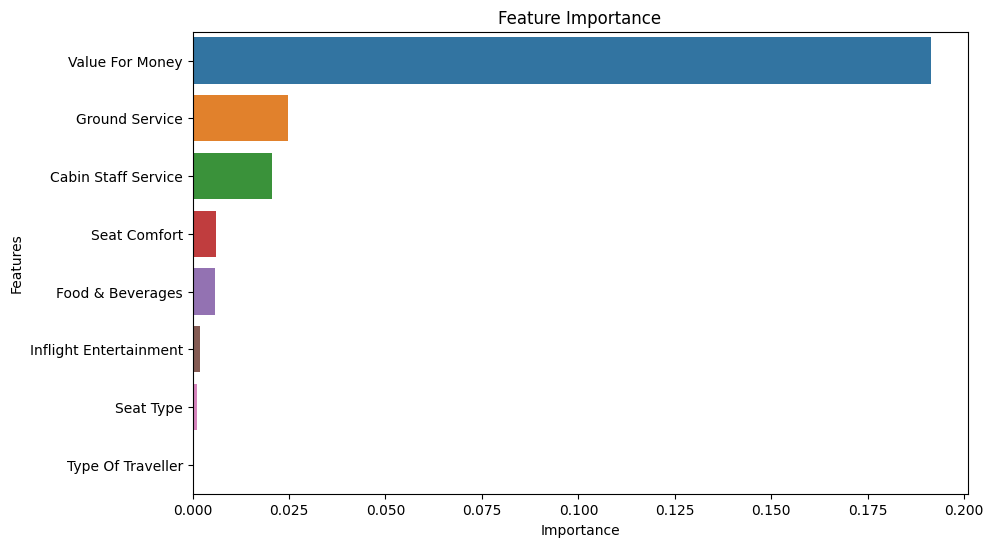

In [54]:
from sklearn.inspection import permutation_importance
import seaborn as sns
# Permutation Importance of each service features
# Perform permutation importance
result = permutation_importance(rf_tuned, X_test, y_test, n_repeats=10, random_state=42)

# Get the feature importances
importances = result.importances_mean

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Print the feature names and their importances
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {importances[idx]}")
    
# Plot the figure show importance of each features

# Get the feature names and their importances
feature_names = X.columns[sorted_indices]
feature_importances = importances[sorted_indices]

# Plot the figure
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()




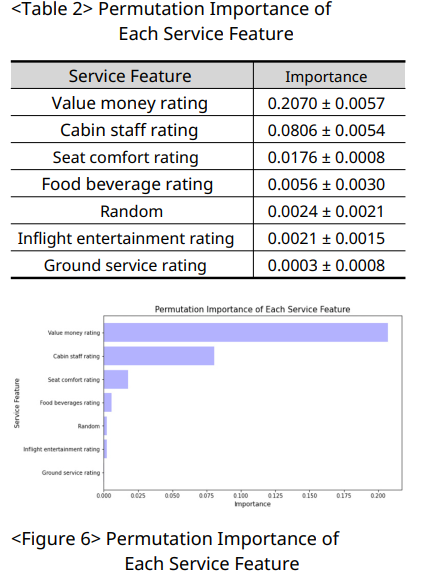

In [41]:
# Import all the models above
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifierCV, RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC, NuSVC #CalibratedClassifierCV NuSVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier


In [46]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)

# LGBM
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

# AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

# RidgeClassifierCV
ridge = RidgeClassifierCV()
ridge.fit(X_train, y_train)

# RidgeClassifier
ridge2 = RidgeClassifier()
ridge2.fit(X_train, y_train)

# LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

# NuSVC
nusvc = NuSVC()
nusvc.fit(X_train, y_train)

# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18453, number of negative: 27892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 46345, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.398166 -> initscore=-0.413113
[LightGBM] [Info] Start training from score -0.413113


ExtraTreesClassifier()

In [56]:
# Write a function perform permutation importance for the first 16 model have accuracy = 0.94 in lazypredict 
def permutation(model, X_test, y_test):
    
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    
    # Get the feature importances
    importances = result.importances_mean
    
    # Sort the feature importances in descending order
    sorted_indices = importances.argsort()[::-1]
    
    # Print the feature names and their importances
    for idx in sorted_indices:
        print(f"{X.columns[idx]}: {importances[idx]}")
        
    # Plot the figure
    feature_names = X.columns[sorted_indices]
    feature_importances = importances[sorted_indices]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_names)
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance of'+ str(model)[:-2])
    plt.show()


Value For Money: 0.182402692672823
Ground Service: 0.027876068007249476
Cabin Staff Service: 0.025804781220333094
Seat Comfort: 0.007629239665141974
Food & Beverages: 0.003771468024510216
Inflight Entertainment: 0.0011737291792525805
Seat Type: 0.0005005609735047933
Type Of Traveller: -0.0002675412099767072


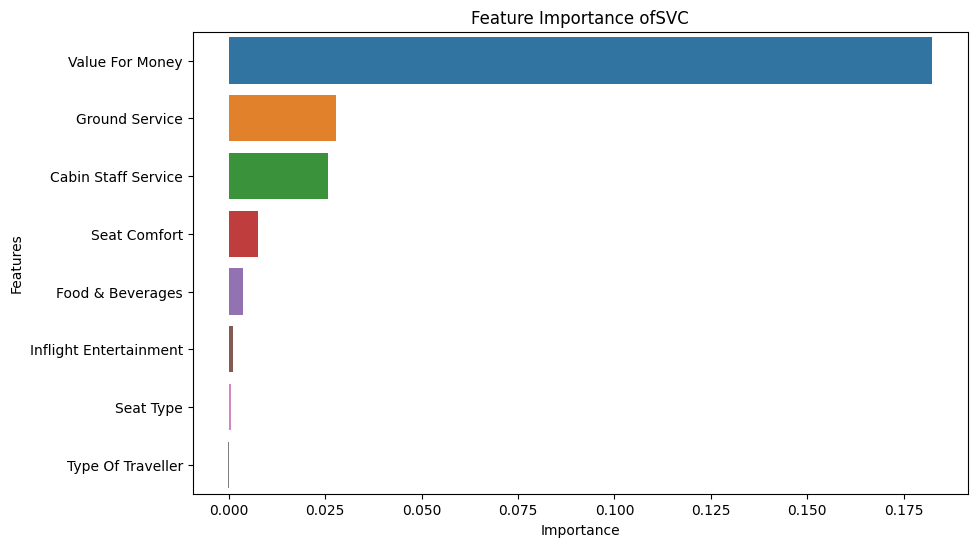

Value For Money: 0.1852075601967723
Ground Service: 0.02559765254164149
Cabin Staff Service: 0.02024682834210755
Seat Comfort: 0.006343315784931414
Food & Beverages: 0.004617243462501097
Inflight Entertainment: 0.0010183826702339193
Seat Type: 0.00027617157158886795
Type Of Traveller: -0.00020712867869160378


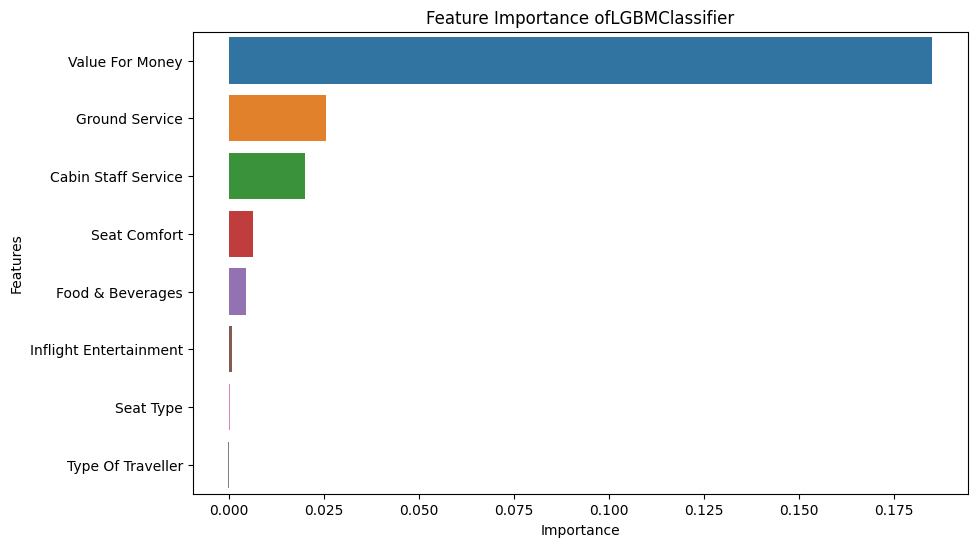

Value For Money: 0.14904634504185718
Ground Service: 0.01893501337706045
Cabin Staff Service: 0.00812117027703455
Food & Beverages: 0.003426253560024117
Seat Comfort: 0.0031587123500474213
Inflight Entertainment: 0.0012341417105376062
Seat Type: 0.00046603952705613904
Type Of Traveller: 0.00045740916544397827


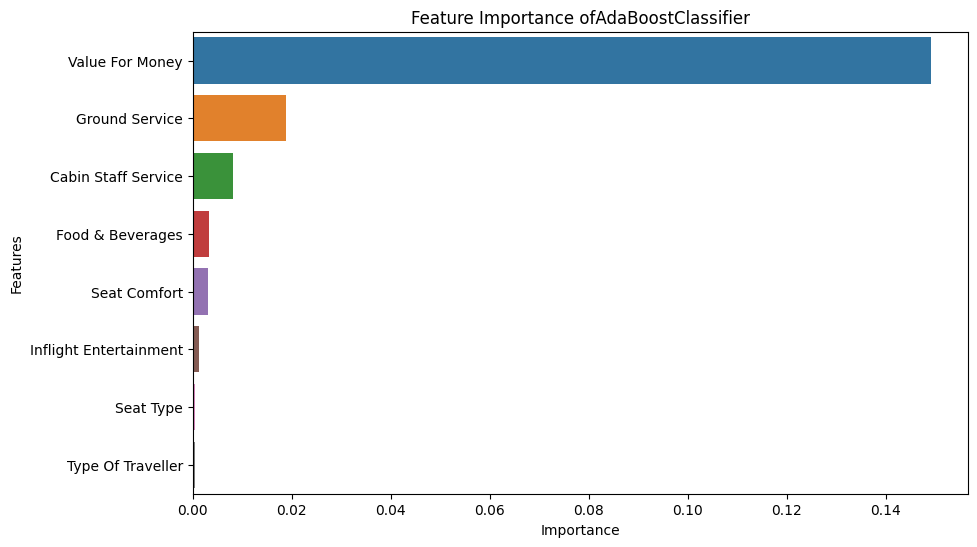

Value For Money: 0.26042116164667295
Ground Service: 0.020730128592387997
Cabin Staff Service: 0.007284025200655875
Food & Beverages: 0.004660395270561812
Seat Comfort: 0.0018641581082246895
Type Of Traveller: 0.0005696038664019576
Inflight Entertainment: 0.0001553465090187056
Seat Type: -5.178216967293148e-05


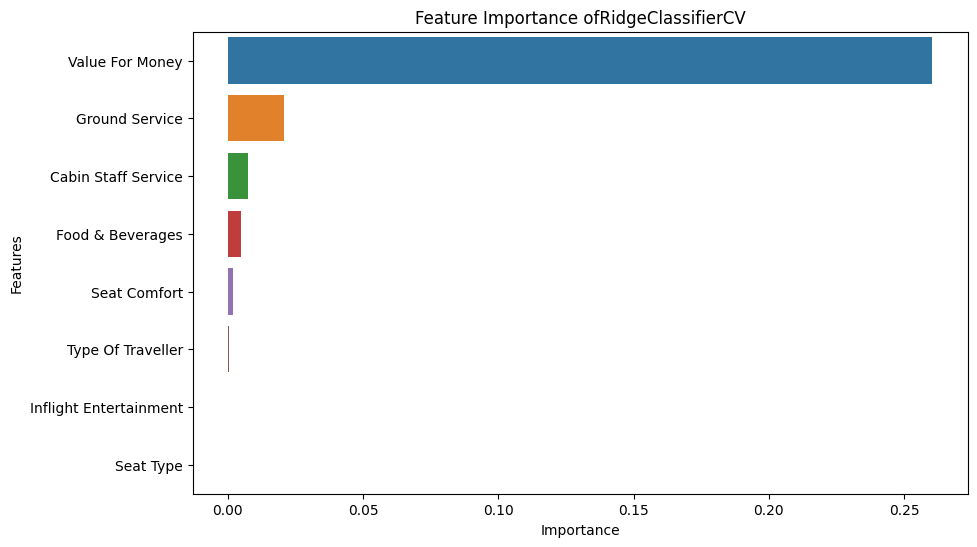

Value For Money: 0.2604643134547337
Ground Service: 0.020730128592387997
Cabin Staff Service: 0.007284025200655875
Food & Beverages: 0.004660395270561812
Seat Comfort: 0.0018641581082246895
Type Of Traveller: 0.0005696038664019576
Inflight Entertainment: 0.0001553465090187056
Seat Type: -5.178216967293148e-05


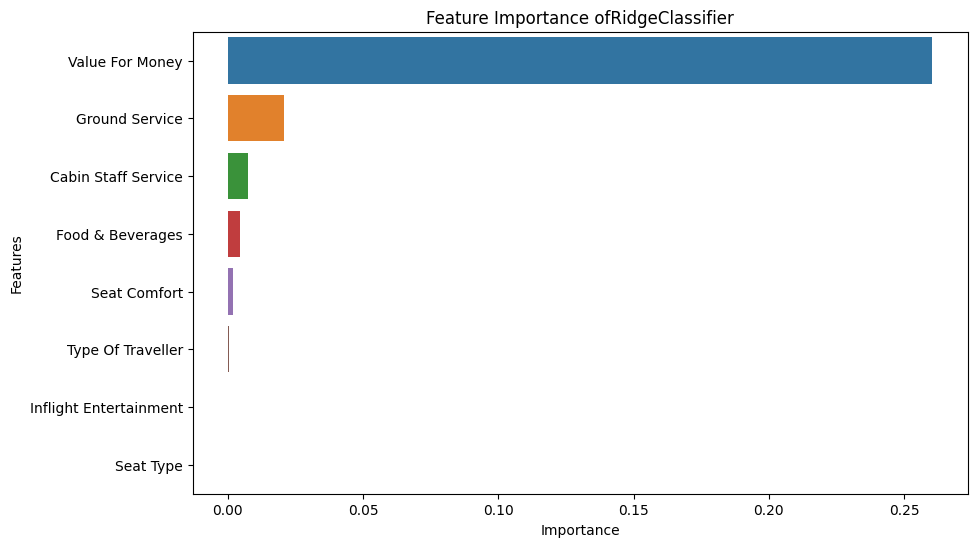

Value For Money: 0.15003883662725462
Ground Service: 0.019193924225424975
Cabin Staff Service: 0.010900146716147353
Seat Comfort: 0.0034435142832484277
Food & Beverages: 0.0024941745059117505
Inflight Entertainment: 0.0004833002502804162
Seat Type: 6.904289289717535e-05
Type Of Traveller: -0.00031932337964967193


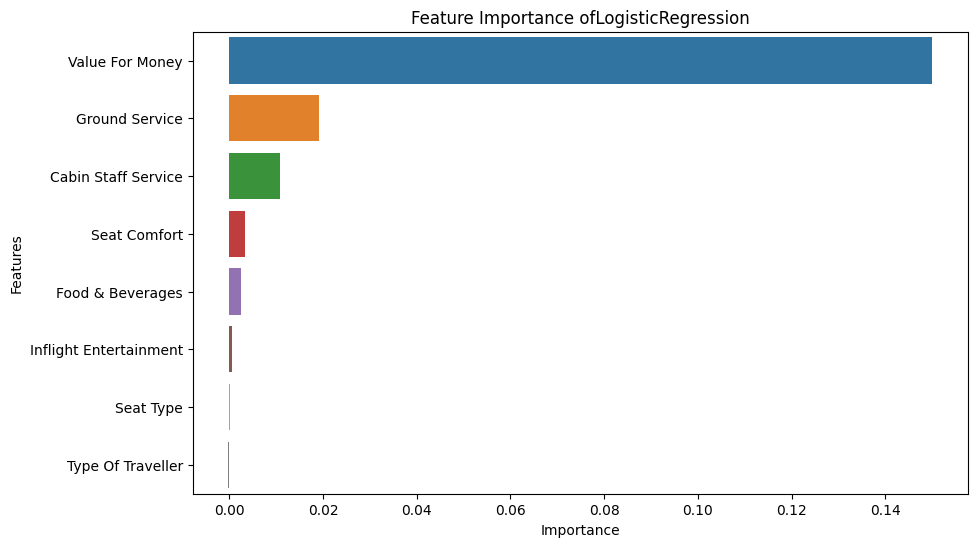

Value For Money: 0.14919306118926381
Ground Service: 0.019642703029256903
Cabin Staff Service: 0.009890394407525671
Seat Comfort: 0.004746698886683343
Food & Beverages: 0.0011219470095797045
Seat Type: 6.904289289719757e-05
Inflight Entertainment: -0.000181237593855188
Type Of Traveller: -0.0008026236299301326


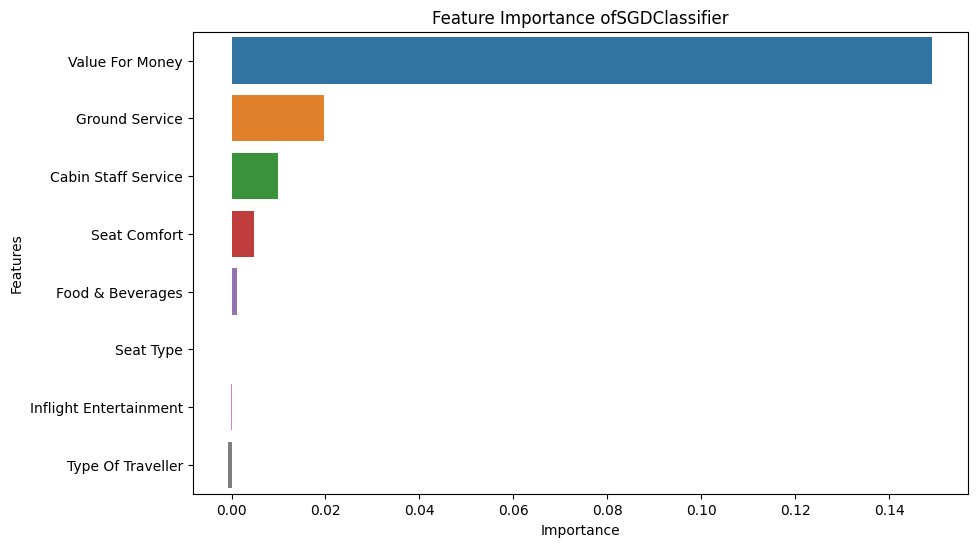

Value For Money: 0.26064555104858894
Ground Service: 0.02051436955208421
Cabin Staff Service: 0.00718909122292224
Food & Beverages: 0.004548200569603855
Seat Comfort: 0.0017174419608181669
Type Of Traveller: 0.0005954949512384844
Inflight Entertainment: -1.726072322428829e-05
Seat Type: -6.904289289719757e-05


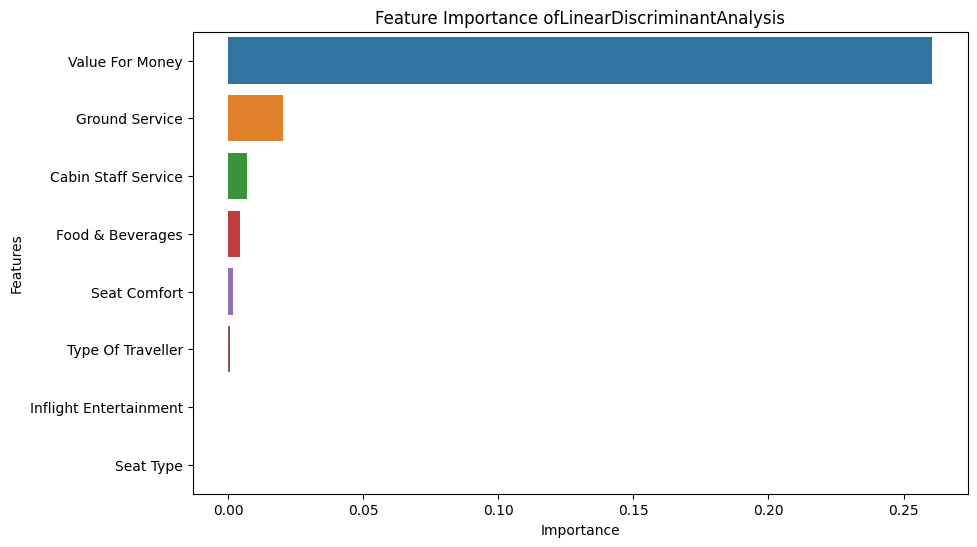

Value For Money: 0.15269698800379733
Ground Service: 0.019444204712177404
Cabin Staff Service: 0.011340295158367087
Seat Comfort: 0.0038750323638560126
Food & Beverages: 0.0027962371623370787
Inflight Entertainment: 0.0006127556744627393
Seat Type: 0.000198498317079443
Type Of Traveller: 8.630361612116389e-06


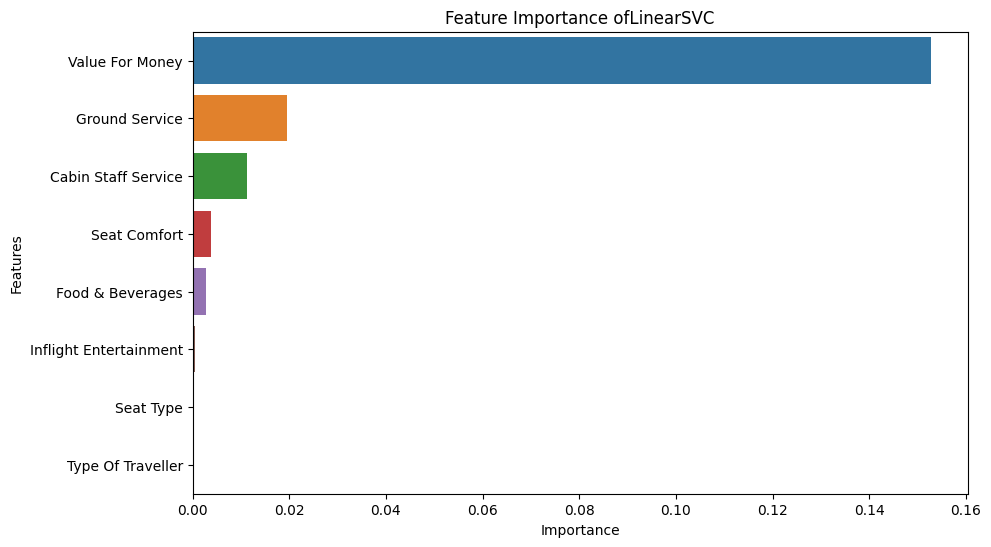

Value For Money: 0.06052472598601881
Ground Service: 0.033934581858979906
Cabin Staff Service: 0.01997065677051868
Seat Comfort: 0.010218348148787438
Food & Beverages: 0.0063950979546042895
Inflight Entertainment: 0.0011909899024769243
Type Of Traveller: -0.00012082506257011793
Seat Type: -0.0001726072322430383


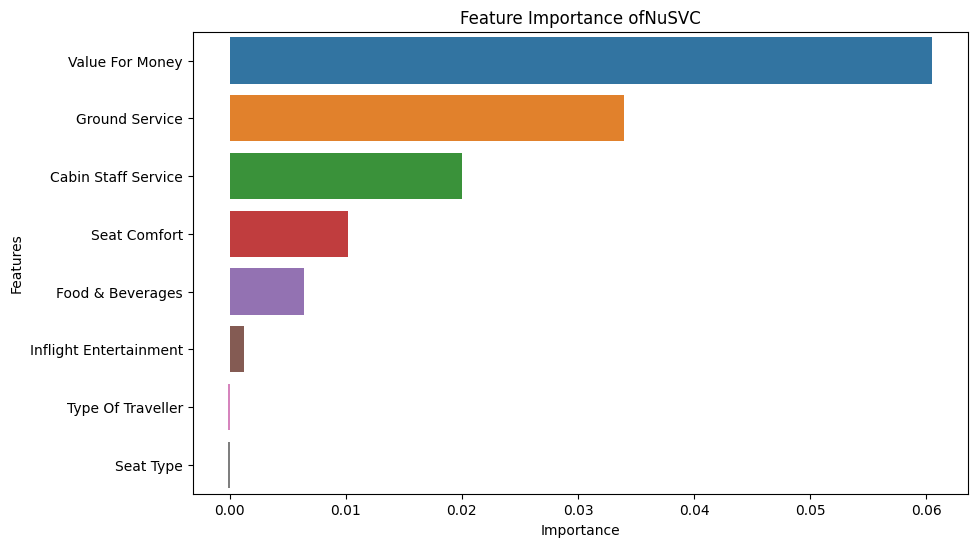

Value For Money: 0.2105635626132735
Cabin Staff Service: 0.05864330715456979
Ground Service: 0.021144385949771295
Seat Comfort: 0.00437559333736085
Food & Beverages: 0.0029170622249072298
Seat Type: 0.00031932337964962754
Inflight Entertainment: 3.452144644860988e-05
Type Of Traveller: -8.630361612149695e-05


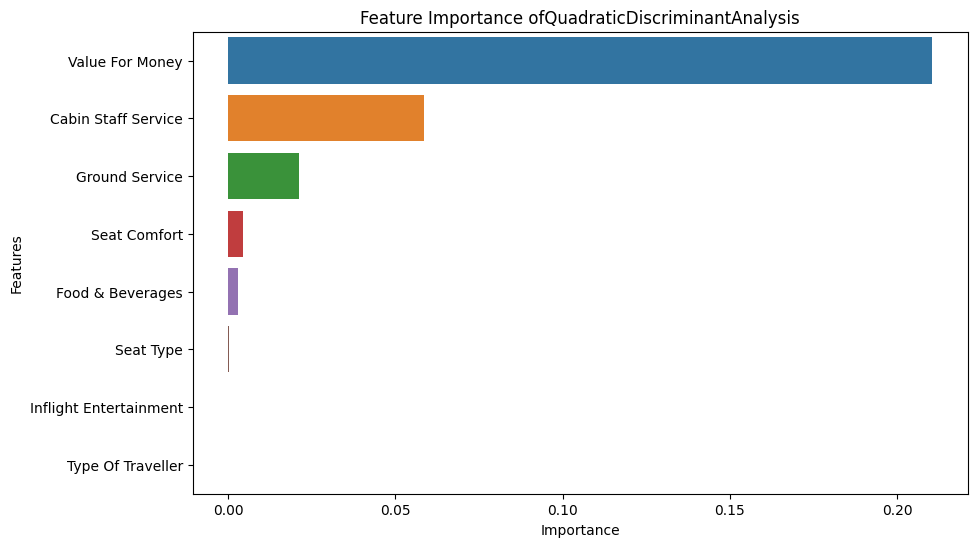

Value For Money: 0.16178475878139295
Ground Service: 0.046672995598515586
Cabin Staff Service: 0.02945542418227326
Seat Comfort: 0.012039354448951434
Food & Beverages: 0.006714421334253906
Inflight Entertainment: 0.0036506429619401204
Type Of Traveller: 0.0013981185811685725
Seat Type: -0.0005350824199533699


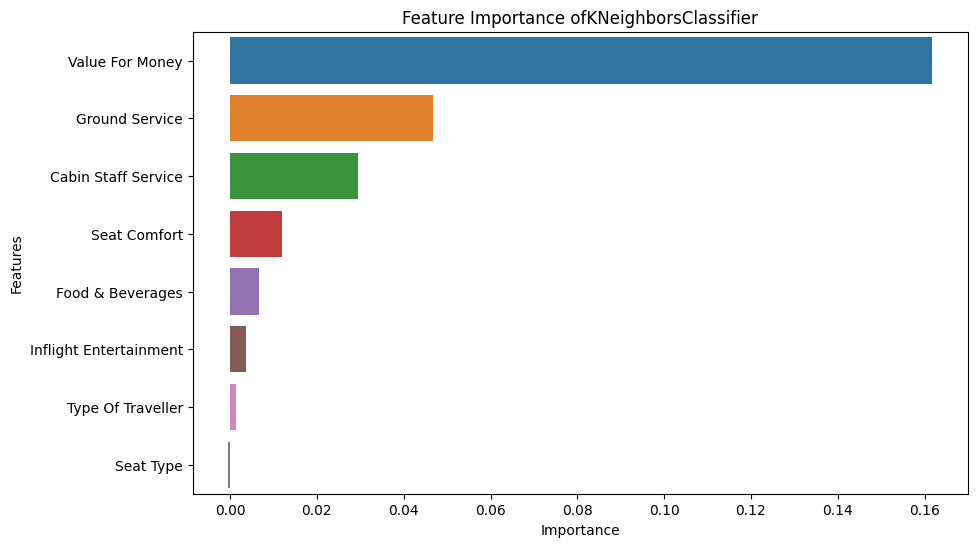

Value For Money: 0.0657633554845948
Ground Service: 0.019029947354794165
Cabin Staff Service: 0.014412703892293089
Seat Comfort: 0.006118926383015466
Food & Beverages: 0.0039009234486924948
Seat Type: -0.00014671614740657812
Inflight Entertainment: -0.0001812375938551769
Type Of Traveller: -0.0003797359109346754


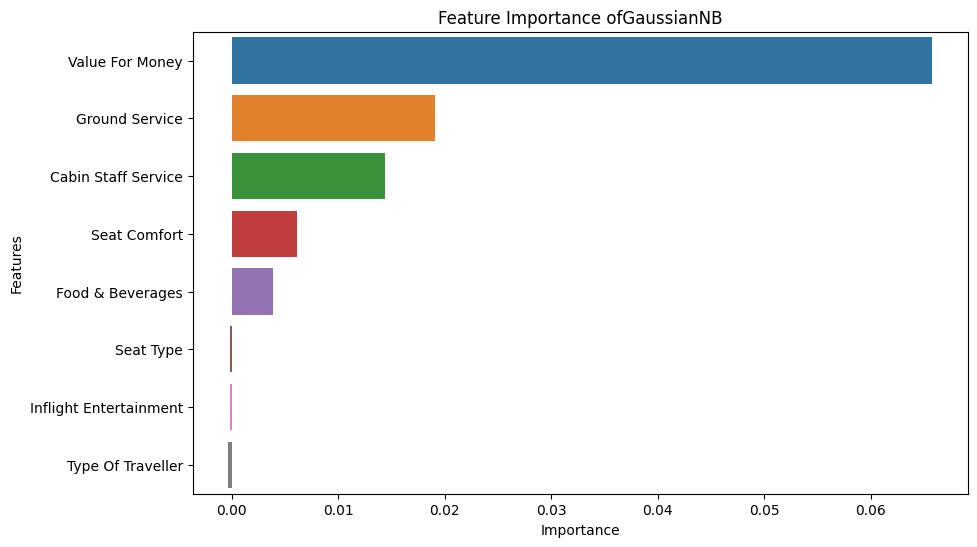

Value For Money: 0.18343833606628124
Ground Service: 0.053016311383447014
Cabin Staff Service: 0.03570380598947102
Seat Comfort: 0.015655475964442944
Food & Beverages: 0.00740485026322607
Inflight Entertainment: 0.00324501596616904
Type Of Traveller: 0.00047466988866839976
Seat Type: 0.00044014844221977877


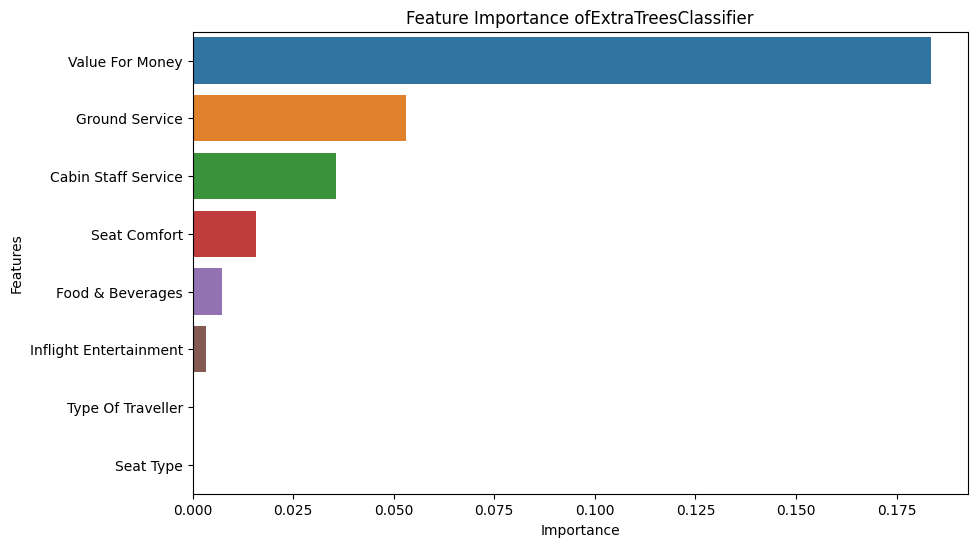

In [57]:
models = [svc, lgbm, ada, ridge, ridge2, logistic, sgd, lda, lsvc, nusvc, qda, knn, gnb, etc]

for model in models:
    permutation(model, X_test, y_test)